Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased
dopamine levels in the brain. It manifests itself through a deterioration of movement, including
the presence of tremors and stiffness. There is commonly a marked effect on speech, including
dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced
pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of
the patient and observing motor skills in various situations. Since there is no definitive
laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when
motor effects are not yet severe. Monitoring progression of the disease over time requires
repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features,
voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms
could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
effective screening step prior to an appointment with a clinician.


In [238]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report,confusion_matrix
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

# Question 1. Load the dataset

In [239]:
pd_df = pd.read_csv("C:\\Users\\srivi\\Downloads\\parkinsons.csv")

In [240]:
pd_df.sample(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.000030,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
48,phon_R01_S13_1,122.188,128.611,115.765,0.00524,0.000040,0.00169,0.00203,0.00507,0.01613,...,0.02566,0.00839,23.162,0,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
64,phon_R01_S17_5,229.401,252.221,221.156,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,...,0.02308,0.00300,26.415,0,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.000030,0.00166,0.00190,0.00499,0.01358,...,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376
118,phon_R01_S27_4,178.285,442.824,82.063,0.00462,0.000030,0.00157,0.00194,0.00472,0.01279,...,0.01851,0.00856,25.020,1,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
115,phon_R01_S27_1,151.872,492.892,69.085,0.00856,0.000060,0.00404,0.00385,0.01211,0.01843,...,0.02389,0.06051,23.693,1,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.000140,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
79,phon_R01_S20_2,100.770,115.697,85.545,0.01038,0.000100,0.00622,0.00576,0.01865,0.03121,...,0.05320,0.02220,19.200,1,0.594387,0.790117,-4.913885,0.265699,2.398422,0.277948
31,phon_R01_S07_2,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


# Question 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [241]:
pd_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [242]:
pd_df.shape

(195, 24)

# Insight:
There are 195 record samples and 24 features in data set

Status is the target column 1 - Parkinsons disease, 0 - Healthy.

Name is a non-significant feature so it can be removed later.

Other independent features represents voice data.

In [243]:
pd_df.isnull().sum().any()

False

# Insight:
There are no missing values in data set

In [244]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Insight:
All the features are numeric except name, which is actually a non significant column which can be removed later

In [245]:
pd_df[pd_df == 0].count()

name                 0
MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)         0
MDVP:Flo(Hz)         0
MDVP:Jitter(%)       0
MDVP:Jitter(Abs)     0
MDVP:RAP             0
MDVP:PPQ             0
Jitter:DDP           0
MDVP:Shimmer         0
MDVP:Shimmer(dB)     0
Shimmer:APQ3         0
Shimmer:APQ5         0
MDVP:APQ             0
Shimmer:DDA          0
NHR                  0
HNR                  0
status              48
RPDE                 0
DFA                  0
spread1              0
spread2              0
D2                   0
PPE                  0
dtype: int64

# Insight:
Checking if the 0's in all columns are valid. 

0's in status column is valid as it represents healthy (no parkinsons disease). 

Other columns doesn't have 0 values.

In [246]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# Insight:
From the count of all features we can say that there are no missing values.

spread2 is negative.

Comparing mean and max values of all the features, MDVP:Fhi(Hz) clearly shows there are outliers. Other outliers can be accurately seen from box plot.
	
By comparing mean and 50% values of all the features, MDVP:Fhi(Hz) has distribution deviated. 

There are only less # of data in the data set. 

In [247]:
pd_df.drop(labels=['name'], axis=1, inplace=True)
print(pd_df.columns)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


# Question 3. Using univariate & bivariate analysis to check the individual attributes for their basicstatistic such as central values, spread, tails etc. What are your observations? (15 points)

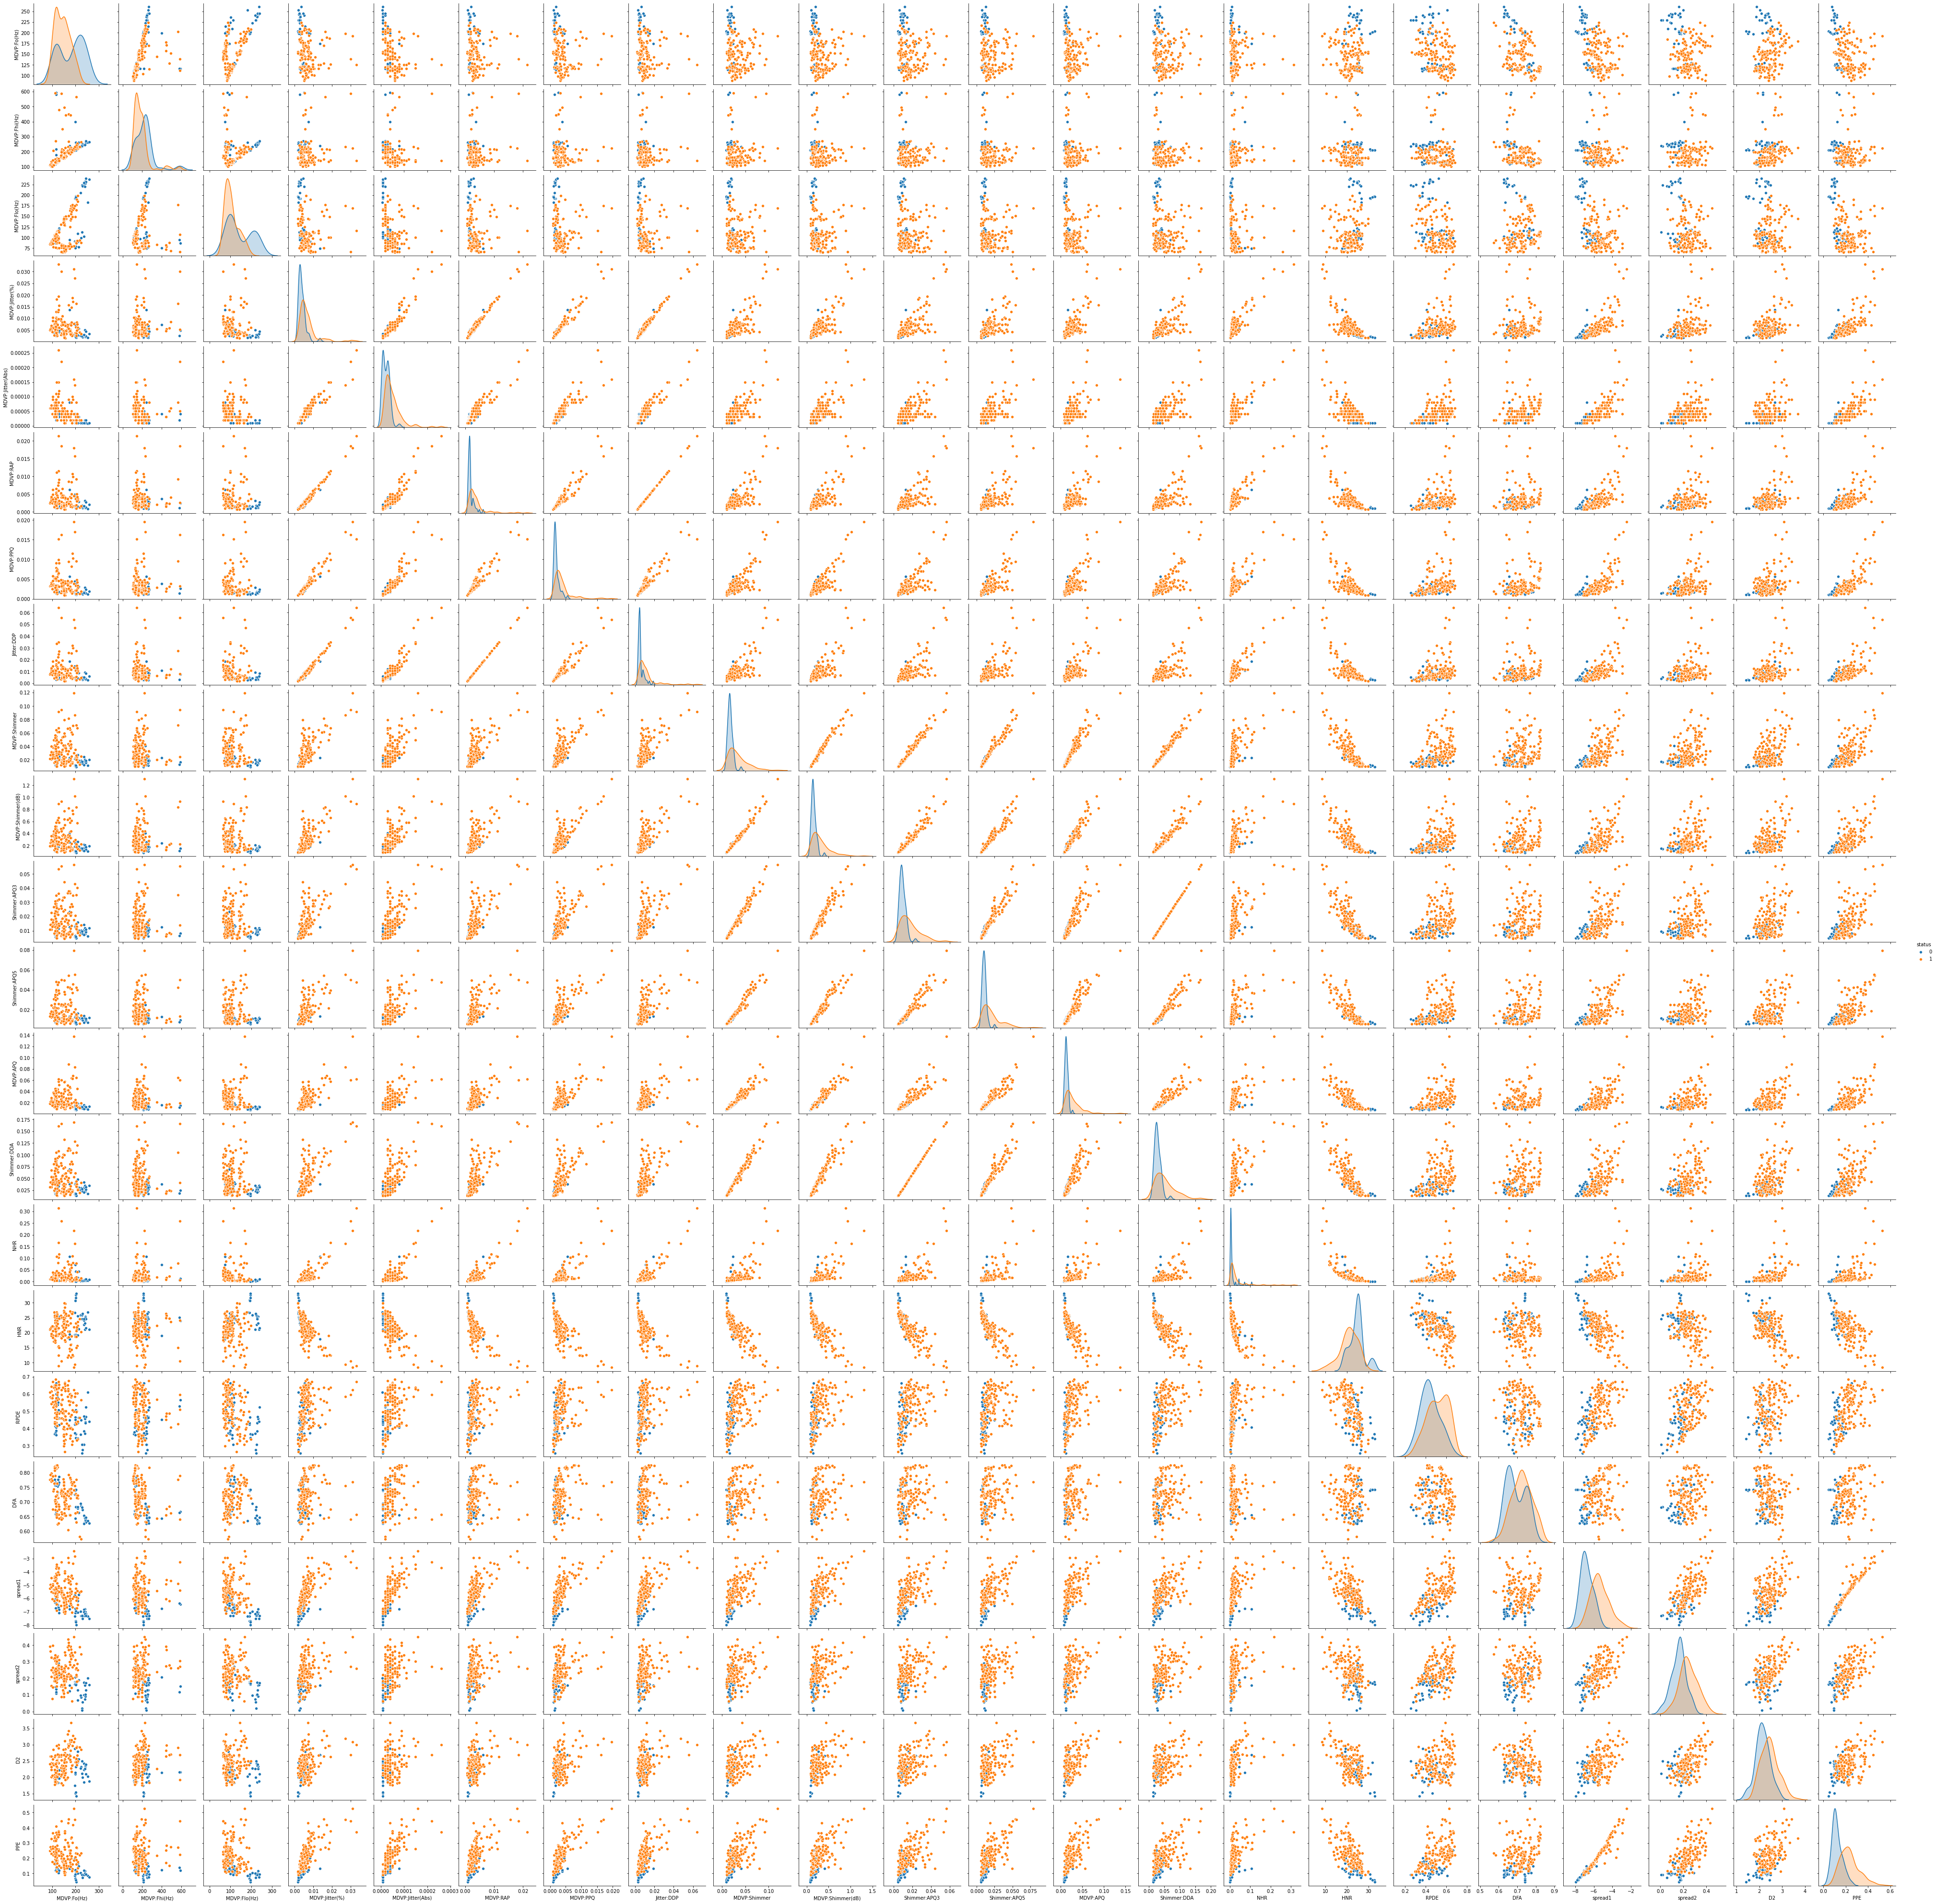

In [248]:
sns.pairplot(pd_df,hue='status')

# Insight:
MDVP:Fo(Hz), MDVP:Jitter(%), Spread1, spread2, D2, PPE features shows some difference between the parkinsons disease and can be significant features to be used to classify the disease.

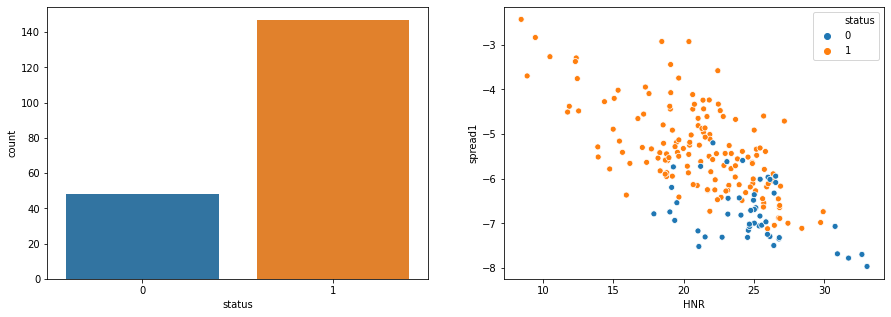

In [249]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='status', data=pd_df, ax=axes[0])
sns.scatterplot(x='HNR', y='spread1', hue='status', data=pd_df, ax=axes[1])

# Insight:
There are only less examples of healthy records compared to parkinsons disease records. Imbalanced data set.

Heathy data - where the spread1 is low and HNR is high. But no clear speration of parkinsons disease data points.

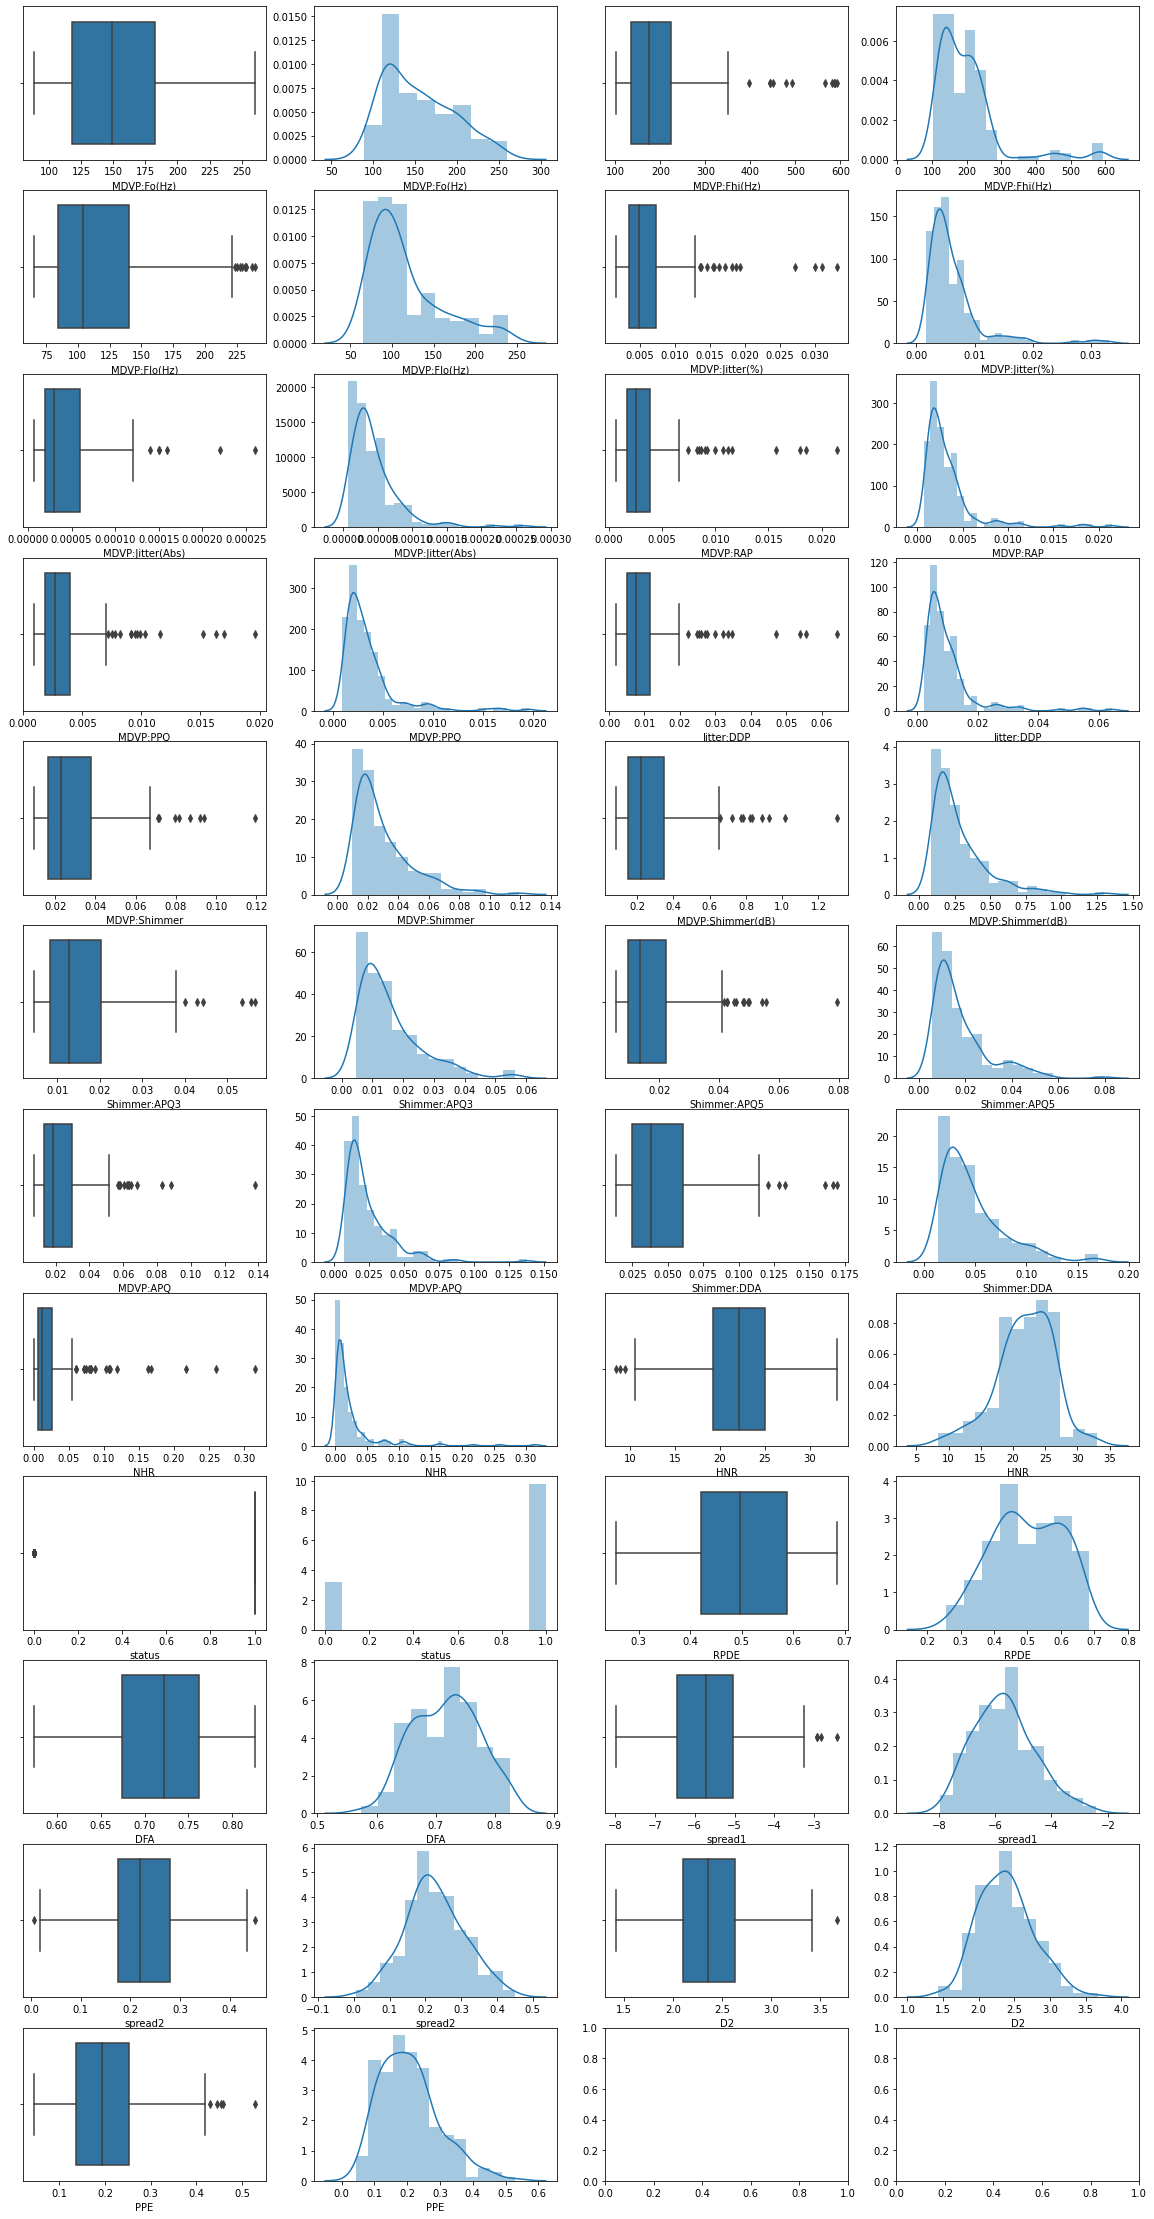

In [250]:
#f, axes = plt.subplots(6, 4, figsize=(20,40))
#k=0
#for i in range(0,6):
#    for j in range(0,4):
#        if k<=22:
#            sns.boxplot(x=pd_df.columns[k], data=pd_df, ax=axes[i,j])
#            k=k+1
    
f, axes = plt.subplots(12, 4, figsize=(20,40))
k=0
for i in range(0,12):
    for j in range(0,4):
        if k<=22:
            if (j%2==0):
                sns.boxplot(x=pd_df.columns[k], data=pd_df, ax=axes[i,j])
            else:
                sns.distplot(pd_df[pd_df.columns[k]] , ax=axes[i,j])
                k=k+1


# Insight:
Leaving the target column (status) plot for the insight.

There are no outliers for MDVP:Fo(Hz), RPDE, DFA. Other independent features shows the presence of lower and higher outliers.

Except MDVP:Fo(Hz), RPDE, DFA, spread1, spread2, D2 other distribution shows skewness.

Unlike Regression models, Decision tress are not very much affected by outliers and as there are only less samples already, removing the outliers may lead to loss of significant records too. Feature scaling is also not needed because decision trees are not affected by variance.


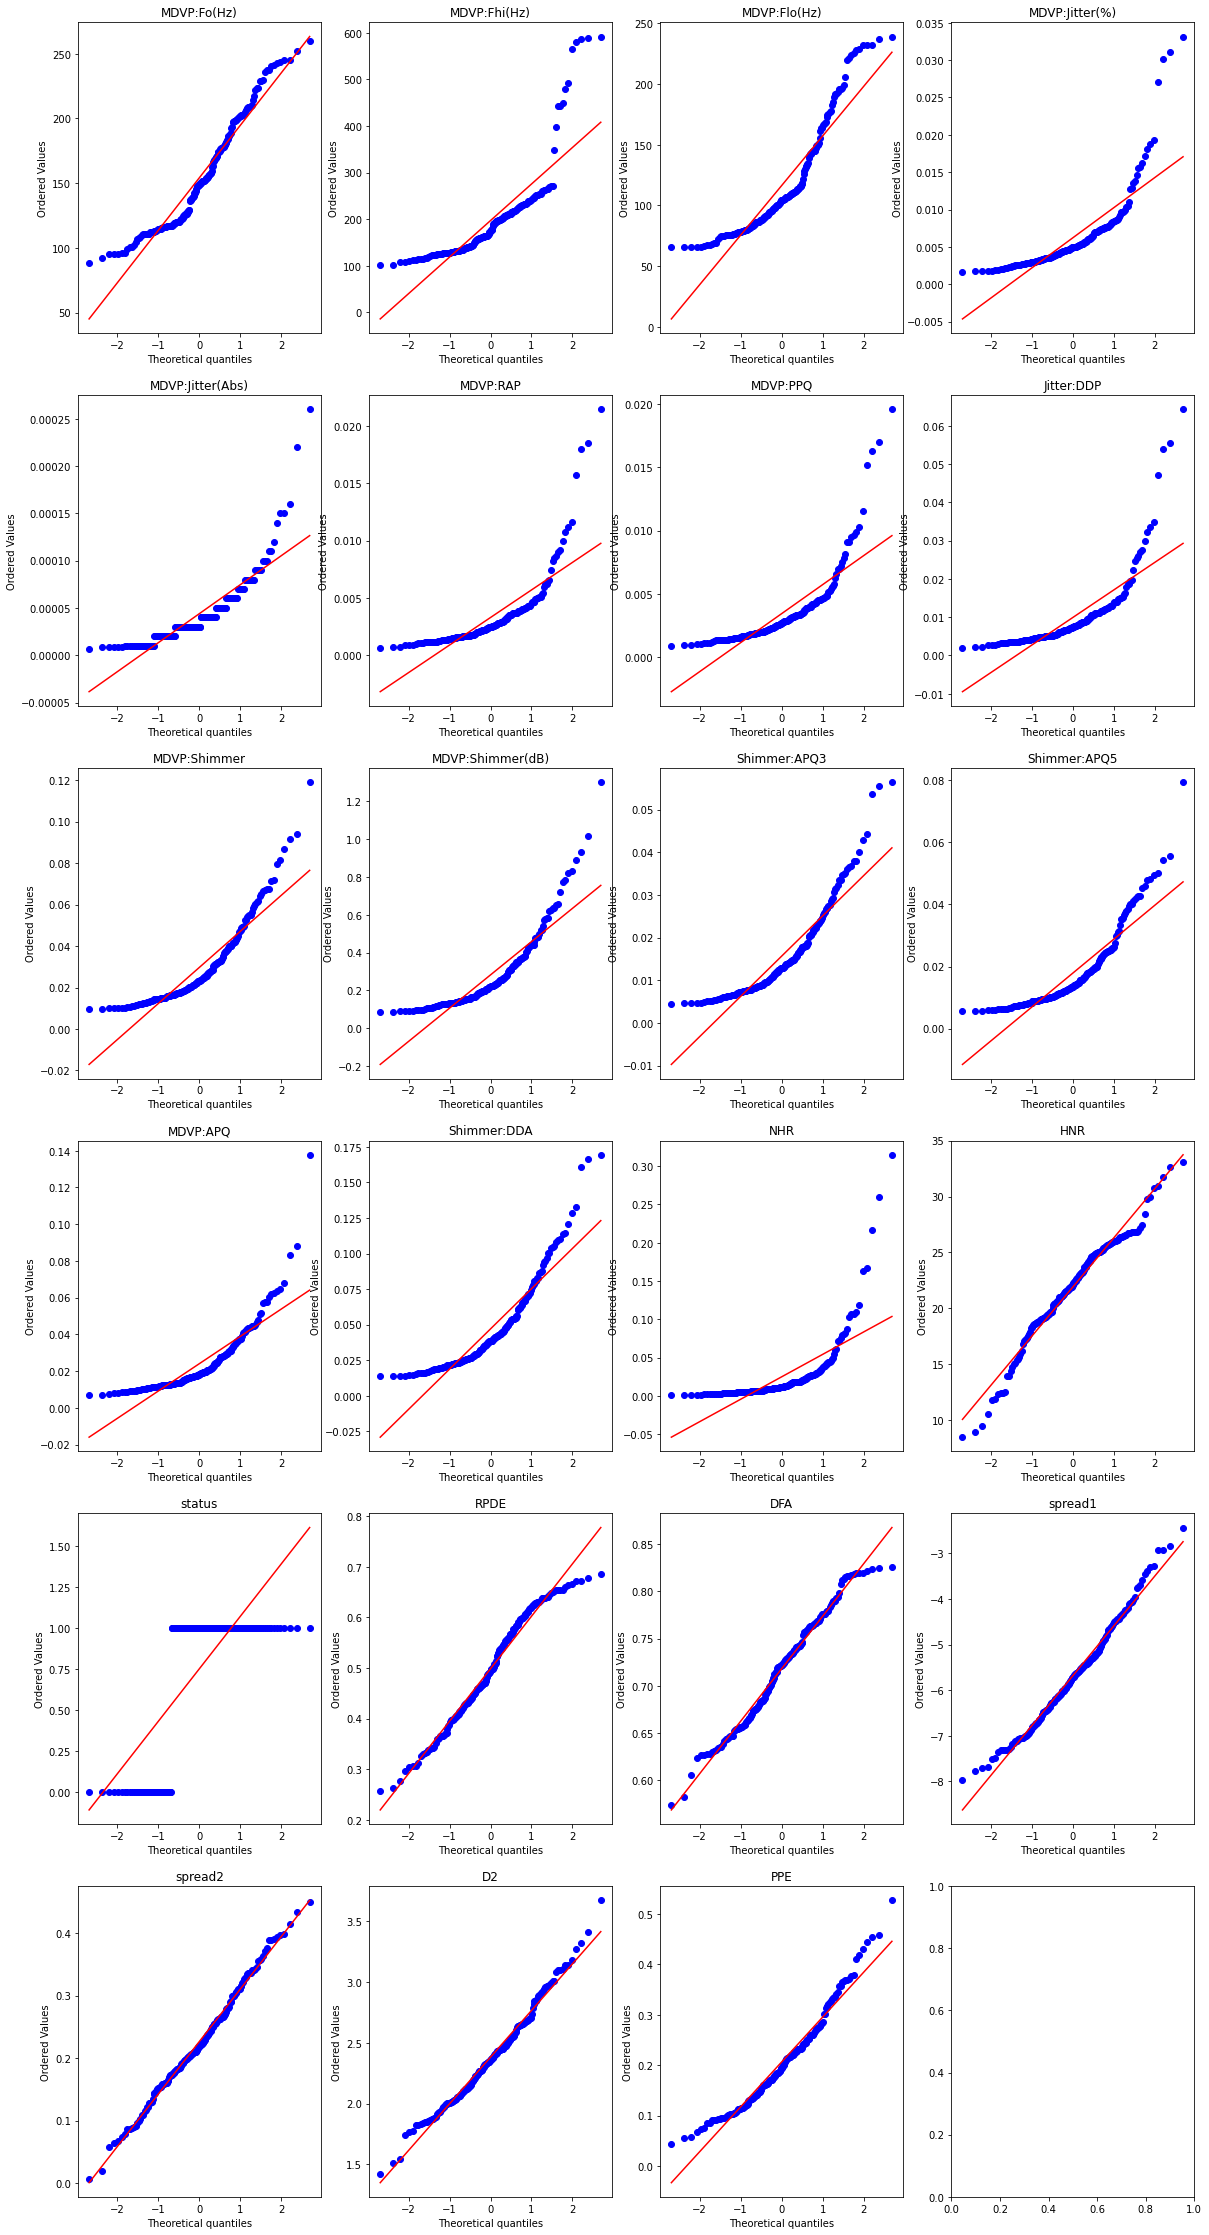

In [251]:
f, axes = plt.subplots(6, 4, figsize=(20,40))
k=0
for i in range(0,6):
    for j in range(0,4):
        if k<=22:
            stats.probplot(pd_df[pd_df.columns[k]], dist="norm", plot=axes[i,j])
            axes[i,j].set_title(pd_df.columns[k])
            k=k+1

# Insight:
HNR, RPDE, DFA, Spread1, spread2, D2, PPE shows likely normal distribution and other features are not normally distributed.

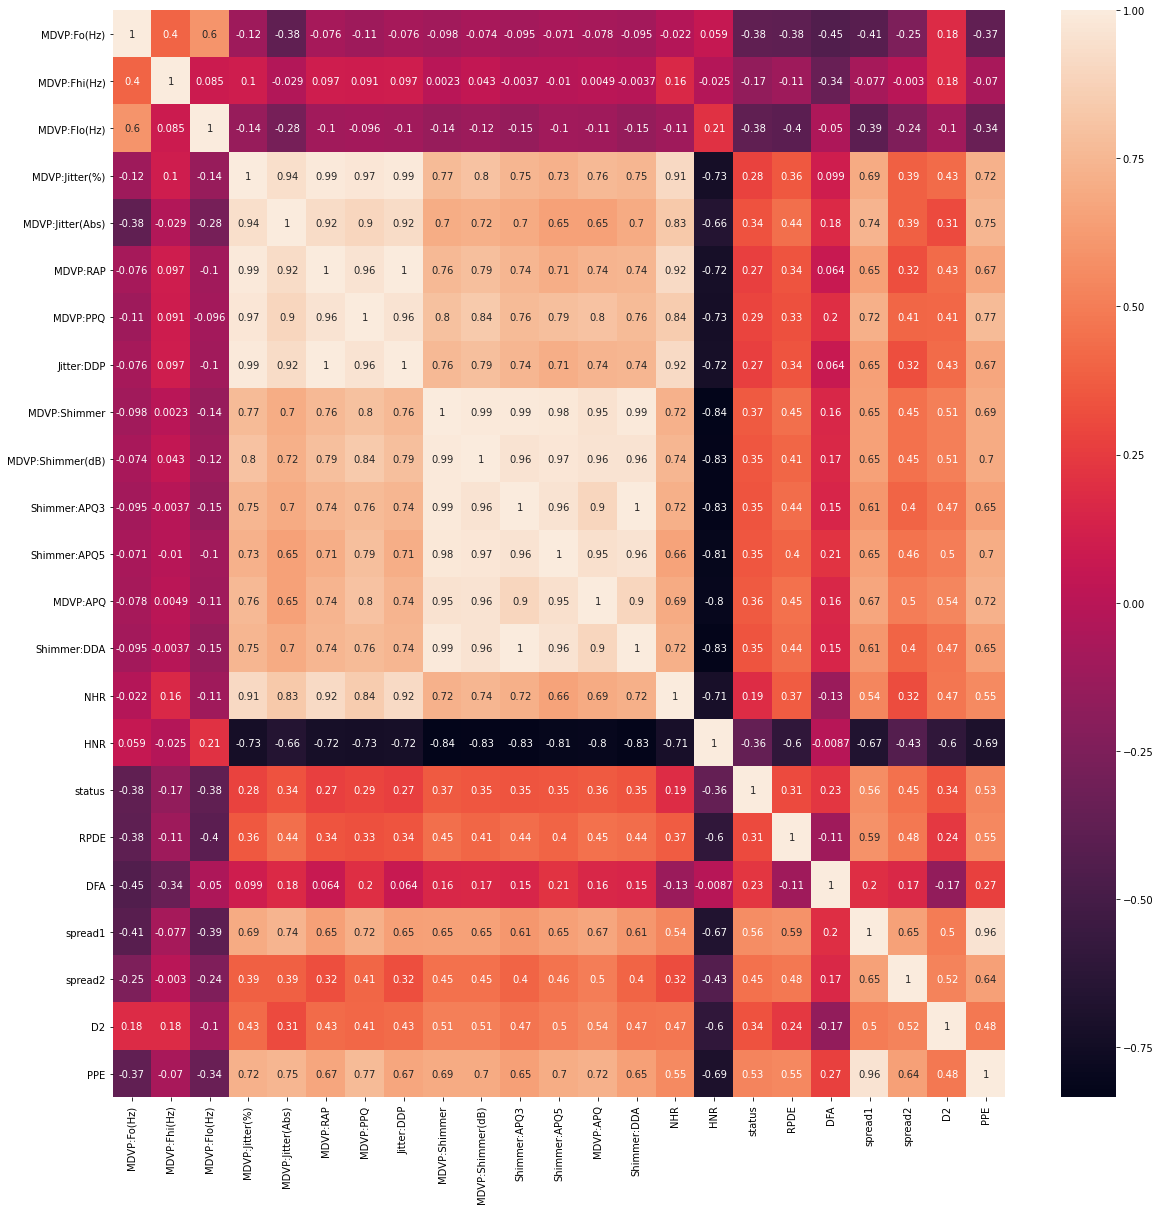

In [252]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(pd_df.corr(), annot=True, ax=ax)

In [253]:
corr_matrix = pd_df.corr()
for i in range(0,len(corr_matrix)):
    for j in range(0,len(corr_matrix)):
        #print(i,j," - ",corr_matrix.iloc[i,j])
        if (corr_matrix.iloc[i,j] >= 0.99) and (i!=j):
            print(corr_matrix.columns[i]," - corr to - ",corr_matrix.columns[j])

MDVP:Jitter(%)  - corr to -  MDVP:RAP
MDVP:Jitter(%)  - corr to -  Jitter:DDP
MDVP:RAP  - corr to -  MDVP:Jitter(%)
MDVP:RAP  - corr to -  Jitter:DDP
Jitter:DDP  - corr to -  MDVP:Jitter(%)
Jitter:DDP  - corr to -  MDVP:RAP
Shimmer:APQ3  - corr to -  Shimmer:DDA
Shimmer:DDA  - corr to -  Shimmer:APQ3


# Insight:
From the corr heat map by comparing status feature with all other features, spread1, spread2 and PPE shows better correlation and hence these features are significant in classifying the target variable.

from the correlation matrix, considering only corr threshold of 0.99 and above, we see that MDVP:Jitter(%) is highly correlated to MDVP:RAP and Jitter:DDP, Shimmer:APQ3 is correlated to Shimmer:DDA.

# Question 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [254]:
X = pd_df.drop(labels=['status'], axis=1)
Y = pd_df['status']

print(X.shape,Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=10)

print("-------------------TRAINING DATA-----------------------")
print("# of rows of independent features in training data : ",x_train.shape)
print("# of rows of target column in training data         : ",y_train.shape)
print("# of rows in target column (groupby status)  : ",y_train.groupby(y_train).count())
print("-------------------TESTING DATA-----------------------")
print("# of rows of independent features in testing data  : ",x_test.shape)
print("# of rows of target column of training data         : ",y_test.shape)
print("# of rows in target column (groupby status)  : ",y_test.groupby(y_test).count())

#Removing multicollinear independent features to seperate data frame

X_rem_correlated = pd_df.drop(labels=['status','MDVP:RAP','Jitter:DDP','Shimmer:APQ3'], axis=1)
x_rem_correlated_train, x_rem_correlated_test, y_rem_correlated_train, y_rem_correlated_test = train_test_split(X_rem_correlated,Y,test_size=0.30,random_state=10)
print("Removed multicollinear features data frame : ",X_rem_correlated.shape,Y.shape)

(195, 22) (195,)
-------------------TRAINING DATA-----------------------
# of rows of independent features in training data :  (136, 22)
# of rows of target column in training data         :  (136,)
# of rows in target column (groupby status)  :  status
0     32
1    104
Name: status, dtype: int64
-------------------TESTING DATA-----------------------
# of rows of independent features in testing data  :  (59, 22)
# of rows of target column of training data         :  (59,)
# of rows in target column (groupby status)  :  status
0    16
1    43
Name: status, dtype: int64
Removed multicollinear features data frame :  (195, 19) (195,)


In [255]:
#here the power transform is not appreciated as the decision tress are not affected by variance but checking the performance
pt = PowerTransformer()

x_pt_train = pt.fit_transform(x_train)
x_pt_rem_correlated_train = pt.fit_transform(x_rem_correlated_train)
x_pt_test = pt.fit_transform(x_test)
x_pt_rem_correlated_test = pt.fit_transform(x_rem_correlated_test)

# Question 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

# Question 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab

In [256]:
print("Training Accuracy\tTesting Accuracy\tRMSE")
dt=DecisionTreeClassifier(criterion='entropy',random_state=10)
dt.fit(x_train, y_train)
predicted_dt = dt.predict(x_test)
print('%.3f'%dt.score(x_train,y_train),'\t\t\t%.3f'
          %dt.score(x_test,y_test),'\t\t\t%.5f'%np.sqrt(mean_squared_error(predicted_dt, y_test)))
print("Confusion Matrix of Decision Tree")
print(confusion_matrix(y_test,predicted_dt))
print("Classificatin Report of Decision Tree")
print(classification_report(y_test,predicted_dt))

Training Accuracy	Testing Accuracy	RMSE
1.000 			0.949 			0.22549
Confusion Matrix of Decision Tree
[[15  1]
 [ 2 41]]
Classificatin Report of Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.98      0.95      0.96        43

    accuracy                           0.95        59
   macro avg       0.93      0.95      0.94        59
weighted avg       0.95      0.95      0.95        59



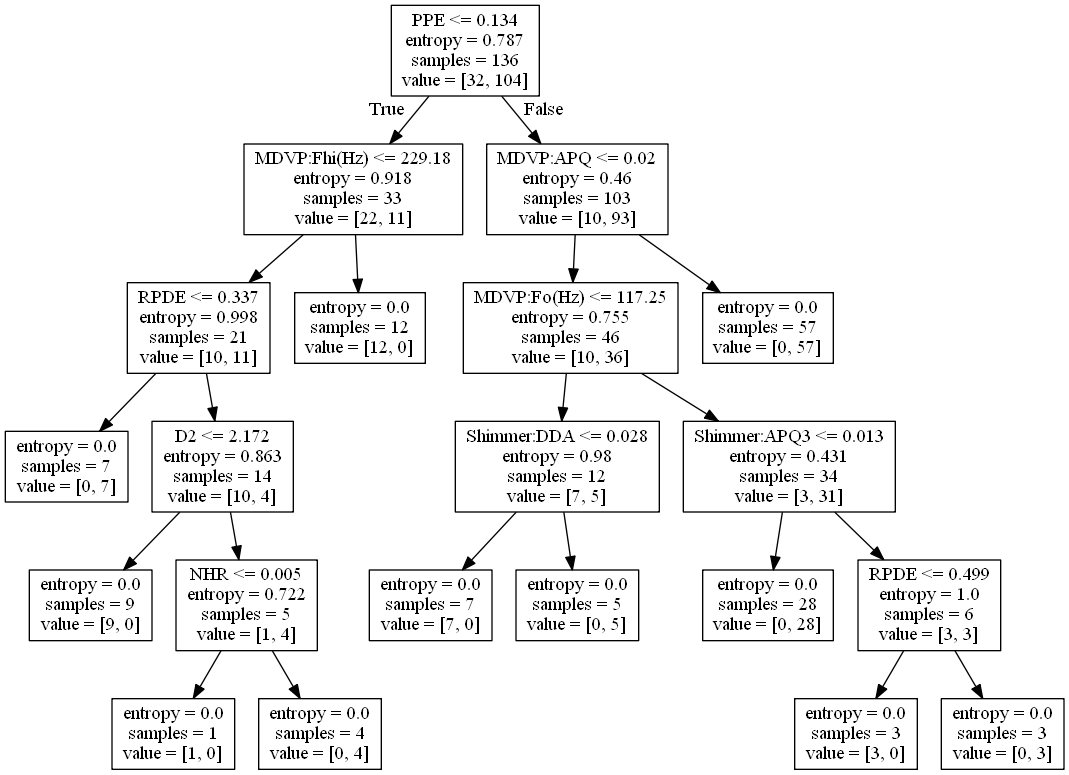

In [257]:
with open("pd10.dot","w") as f:
    f = tree.export_graphviz(dt,
                            feature_names=list(X.columns.values),out_file=f)
import os
from IPython.display import Image
os.environ["PATH"] += os.pathsep + 'C:\\Users\\srivi\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin' 
os.system('dot -Tpng pd10.dot -o pd10.png')
Image("pd4.png")


# Insight:
Building the model with default parameters and only selecting the criteria to be entropy gives very high training accuracy and the model is overfit.

Here only 3 values are wrong but the model may not perform well on future data

F1 score is good for both the classes, despite inbalanced data set. Little tuning of the hyperparameter may lead to good fit model.

In [258]:
print("Training Accuracy\tTesting Accuracy\tRMSE")
dt=DecisionTreeClassifier(criterion='entropy',random_state=10)
dt.fit(x_rem_correlated_train, y_rem_correlated_train)
predicted_dt_y_corr = dt.predict(x_rem_correlated_test)
print('%.3f'%dt.score(x_rem_correlated_train,y_rem_correlated_train),'\t\t\t%.3f'
          %dt.score(x_rem_correlated_test,y_rem_correlated_test),'\t\t\t%.5f'
          %np.sqrt(mean_squared_error(predicted_dt_y_corr, y_rem_correlated_test)))
print("Confusion Matrix of Decision Tree")
print(confusion_matrix(y_rem_correlated_test,predicted_dt_y_corr))
print("Classificatin Report of Decision Tree")
print(classification_report(y_rem_correlated_test,predicted_dt_y_corr))

Training Accuracy	Testing Accuracy	RMSE
1.000 			0.915 			0.29111
Confusion Matrix of Decision Tree
[[12  4]
 [ 1 42]]
Classificatin Report of Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.91      0.98      0.94        43

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.92      0.92      0.91        59



In [259]:
print("Training Accuracy\tTesting Accuracy\tRMSE")
dt=DecisionTreeClassifier(criterion='entropy',random_state=10)
dt.fit(x_pt_train, y_train)
predicted_dt_y_pt = dt.predict(x_pt_test)
print('%.3f'%dt.score(x_pt_train,y_train),'\t\t\t%.3f'%dt.score(x_pt_test,y_test),'\t\t\t%.5f'
          %np.sqrt(mean_squared_error(predicted_dt_y_pt, y_test)))
print("Confusion Matrix of Decision Tree")
print(confusion_matrix(y_test,predicted_dt_y_pt))
print("Classificatin Report of Decision Tree")
print(classification_report(y_test,predicted_dt_y_pt))

Training Accuracy	Testing Accuracy	RMSE
1.000 			0.881 			0.34445
Confusion Matrix of Decision Tree
[[12  4]
 [ 3 40]]
Classificatin Report of Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.91      0.93      0.92        43

    accuracy                           0.88        59
   macro avg       0.85      0.84      0.85        59
weighted avg       0.88      0.88      0.88        59



# Insight:
Here scaling is non necessary because, decision tree is not affected by variance. Also transformed data and multicollinearity removed data doesn't improve accuracy. Still a overfit model.

# Question 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

Max depth	Training Accuracy	Testing Accuracy
1 		0.819 			0.854
2 		0.823 			0.850
3 		0.836 			0.847
4 		0.843 			0.852
5 		0.845 			0.852
6 		0.845 			0.852
7 		0.845 			0.852
8 		0.845 			0.852
9 		0.845 			0.852
10 		0.845 			0.852
11 		0.845 			0.852
12 		0.845 			0.852
13 		0.845 			0.852
14 		0.845 			0.852
15 		0.845 			0.852
16 		0.845 			0.852
17 		0.845 			0.852
18 		0.845 			0.852
19 		0.845 			0.852
20 		0.845 			0.852
21 		0.845 			0.852
22 		0.845 			0.852


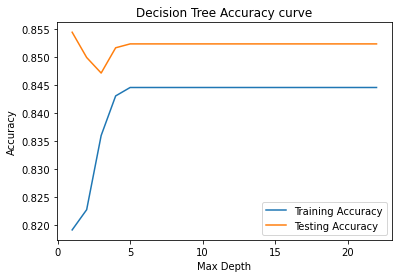

Confusion Matrix of Decision Tree
[[12  4]
 [ 1 42]]
Classificatin Report of Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.91      0.98      0.94        43

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.92      0.92      0.91        59



In [260]:
print("Max depth\tTraining Accuracy\tTesting Accuracy")

train_acc_mean = []
test_acc_mean = []
for i in range(1,23):
    train_acc = []
    test_acc = []
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=10)
    for j in range(1,50):
        dt=DecisionTreeClassifier(criterion='entropy',max_depth=i,min_samples_leaf=j,random_state=10)
        dt.fit(x_train, y_train)
        predicted_dt = dt.predict(x_test)
        #print(i,'\t\t%.3f'%dt.score(x_rem_correlated_train,y_rem_correlated_train),'\t\t\t%.3f'
              #%dt.score(x_rem_correlated_test,y_rem_correlated_test),'\t\t\t%.5f'
              #%np.sqrt(mean_squared_error(predicted_dt, y_rem_correlated_test)))
        train_acc.append(dt.score(x_train,y_train))
        test_acc.append(dt.score(x_test,y_test))
    print(i,'\t\t%.3f'%np.mean(train_acc),'\t\t\t%.3f'%np.mean(test_acc))
    train_acc_mean.append(np.mean(train_acc))
    test_acc_mean.append(np.mean(test_acc))

    
plt.title('Decision Tree Accuracy curve')
plt.plot(range(1,23), train_acc_mean, label = 'Training Accuracy')
plt.plot(range(1,23), test_acc_mean, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()
print("Confusion Matrix of Decision Tree")
print(confusion_matrix(y_rem_correlated_test,predicted_dt_y_corr))
print("Classificatin Report of Decision Tree")
print(classification_report(y_rem_correlated_test,predicted_dt_y_corr))

# Insight:
Without any tuning the model was a overfit model. After tuning the model we got a good fit model. The training and test accuracy differs by 1% and the model is much stable. 

when max depth is 4 or 5 the accuracy is good.

# Question 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [261]:
print("N-Estimators\tMax depth\tTraining Accuracy\tTesting Accuracy\tRMSE")

for i in range(1,6):
    for j in range(1,10):
        rf=RandomForestClassifier(criterion='gini',n_estimators=i,max_depth=j,random_state=10)
        rf.fit(x_train,y_train)
        predicted_rf = rf.predict(x_test)
        print(i,'\t\t',j,'\t\t%.3f'%rf.score(x_train,y_train),'\t\t\t%.3f'%rf.score(x_test,y_test),'\t\t\t%.3f'
              %np.sqrt(mean_squared_error(predicted_rf, y_test)))


N-Estimators	Max depth	Training Accuracy	Testing Accuracy	RMSE
1 		 1 		0.765 			0.729 			0.521
1 		 2 		0.831 			0.797 			0.451
1 		 3 		0.853 			0.797 			0.451
1 		 4 		0.912 			0.864 			0.368
1 		 5 		0.956 			0.864 			0.368
1 		 6 		0.963 			0.881 			0.344
1 		 7 		0.963 			0.881 			0.344
1 		 8 		0.963 			0.881 			0.344
1 		 9 		0.963 			0.881 			0.344
2 		 1 		0.713 			0.729 			0.521
2 		 2 		0.860 			0.831 			0.412
2 		 3 		0.875 			0.831 			0.412
2 		 4 		0.926 			0.898 			0.319
2 		 5 		0.941 			0.847 			0.391
2 		 6 		0.956 			0.847 			0.391
2 		 7 		0.963 			0.898 			0.319
2 		 8 		0.963 			0.898 			0.319
2 		 9 		0.963 			0.898 			0.319
3 		 1 		0.765 			0.729 			0.521
3 		 2 		0.875 			0.864 			0.368
3 		 3 		0.926 			0.864 			0.368
3 		 4 		0.949 			0.898 			0.319
3 		 5 		0.971 			0.831 			0.412
3 		 6 		0.978 			0.881 			0.344
3 		 7 		0.993 			0.898 			0.319
3 		 8 		0.993 			0.898 			0.319
3 		 9 		0.993 			0.898 			0.319
4 		 1 		0.765 			0.729 			0.521
4 		 2 		0.87

In [262]:
rf=RandomForestClassifier(criterion='gini',n_estimators=5,max_depth=4,random_state=10)
rf.fit(x_train,y_train)
predicted_rf = rf.predict(x_test)
print("Training accuracy : ",rf.score(x_train,y_train))
print("Testing accuracy : ",rf.score(x_test,y_test))
print("Confusion Matrix of Decision Tree")
print(confusion_matrix(y_test,predicted_rf))
print("Classificatin Report of Decision Tree")
print(classification_report(y_test,predicted_rf))

Training accuracy :  0.9632352941176471
Testing accuracy :  0.9322033898305084
Confusion Matrix of Decision Tree
[[14  2]
 [ 2 41]]
Classificatin Report of Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.95      0.95      0.95        43

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59



# Insight:
n_estimator greater than 1 and tree depth is 3 or 4 gave better accuracy.

For this data set random forest with gini criteria gave better output than entropy decision trees. For any # of estimatios the depth 4 gave better accuracy good fit model.

F1 score of random forest is better than the decision tree alone and F1 score of class 1 is greater than class 0 is because of more data for class 1.

Overall randomforest performs better than decision tree.